## Importing important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

## Importing Dataset

In [2]:
#importing the Appliances Energy Prediction data
energydata_df = pd.read_csv('energydata_complete.csv')

In [3]:
energydata_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
energydata_df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
energydata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
energydata_df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [7]:
# Removal of two columns- 'date' and 'lights'
energydata_df1 = energydata_df.drop(['date', 'lights'], axis = 1)

In [8]:
energydata_df1

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


## Normalization of the Dataset

In [9]:
#  normalizing the Appliances Energy Prediction dataset to a common scale using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
normalised_energydata_df1 = pd.DataFrame(Scaler.fit_transform(energydata_df1), columns = energydata_df1.columns)
features_df = normalised_energydata_df1.drop(columns= ['Appliances'])
appliances_target = normalised_energydata_df1['Appliances']

In [10]:
features_df.shape

(19735, 26)

In [11]:
appliances_target.shape

(19735,)

## Splitting the dataset into train set and test set

In [12]:
# Splitting the normalised dataset into training and testing dataset. 
# The dataset has already been divided into features and target variables
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, appliances_target, test_size = 0.3, random_state = 42)

## Implementing Linear Regression

In [13]:
linear_model = LinearRegression()

In [14]:
# fitting the model to the training dataset
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#obtaining prediction
predicted_values = linear_model.predict(x_test)

In [16]:
# finding Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, predicted_values)
round(MAE, 3)

0.05

In [17]:
# finding Residual Sum of Squares(RSS)
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

45.348

In [18]:
# finding Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, predicted_values))
round(RMSE, 3)

0.088

In [19]:
# finding R-Squared
from sklearn.metrics import r2_score
R_Squared = r2_score(y_test, predicted_values)
round(R_Squared, 3)

0.149

In [20]:
# Question 19
#Applying Lasso Regresssion and finding the Root Mean Square Error
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
predicted_test = ridge_reg.predict(x_test)
predicted_test
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_test))
round(rmse, 3)

0.088

In [22]:
# Question 20
# Applying Lasso Regression and finding the Root Mean Square Error
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.4)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
predicted_test = lasso_reg.predict(x_test)
predicted_test
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_test))
round(rmse, 3)

0.095

In [24]:
def get_weights_df(model, feat, col_name):
# this function returns the weight of every features
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(3)
    return weights_df 

In [35]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weights')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_Weights')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on = 'Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on = 'Features')

In [36]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weights,Lasso_Weights
0,RH_2,-0.456698,-0.411071,-0.0
1,T_out,-0.321860,-0.262172,0.0
2,T2,-0.236178,-0.201397,0.0
3,T9,-0.189941,-0.188916,0.0
4,RH_8,-0.157595,-0.156830,-0.0
5,RH_out,-0.077671,-0.054724,-0.0
6,RH_7,-0.044614,-0.045977,-0.0
7,RH_9,-0.039800,-0.041367,-0.0
8,T5,-0.015657,-0.019853,0.0
9,T1,-0.003281,-0.018406,0.0


In [26]:
# Question 12 on simple Linear Regression:From the dataset, fit a linear model on the relationship between 
# the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). 
# What is the R^2 value in two D.P?

In [27]:
linear_reg_df = energydata_df[['T2', 'T6']]

In [28]:
linear_reg_df

,T2,T6
0,19.200000,7.026667
1,19.200000,6.833333
2,19.200000,6.560000
3,19.200000,6.433333
4,19.200000,6.366667
...,...,...
19730,25.890000,24.796667
19731,25.754000,24.196667
19732,25.628571,23.626667
19733,25.414000,22.433333


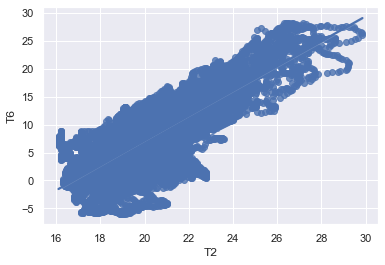

In [29]:
# regression plot
sns.regplot(x ='T2', y ='T6', data = linear_reg_df)

In [30]:
x =linear_reg_df['T2']
y =linear_reg_df['T6']
x.shape, y.shape

((19735,), (19735,))

In [31]:
x_matrix = x.values.reshape(-1,1)

In [32]:
reg = LinearRegression()
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# calculating R^2 value to 2d.p
r_squared = reg.score(x_matrix,y)
round(r_squared, 2)

0.64

In [34]:
reg.coef_

array([2.22506139])